In [1]:
from gflownet_tutorial.gfn import GFNAgent

In [2]:
agent = GFNAgent(epochs=200)

2022-08-18 19:04:04.732379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

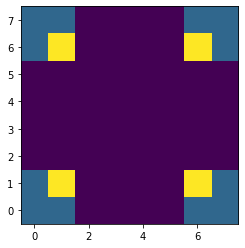

In [3]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [4]:
agent.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 2, 8)]       0           []                               
                                                                                                  
 flatten (Flatten)              (None, 16)           0           ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 32)           544         ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           1056        ['dense_1[0][0]']                
                                                                                              

In [5]:
agent.z0

<tf.Variable 'z0:0' shape=() dtype=float32, numpy=0.0>

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 0s 624us/step


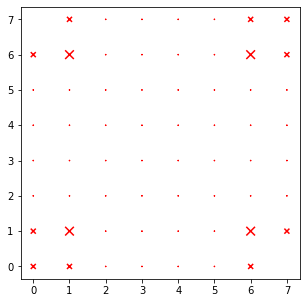

In [6]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [7]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

There are 4 unique modes and 62 unique positions in the training data.


Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

2/2 [==============================] - 0s 2ms/step


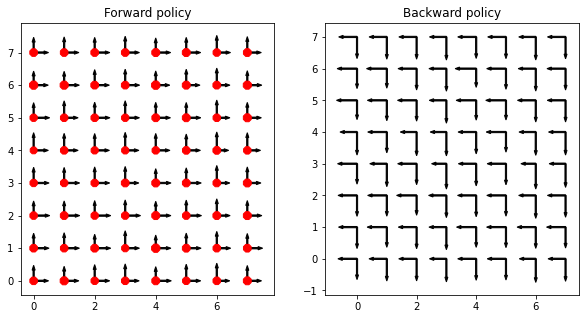

In [8]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 640us/step


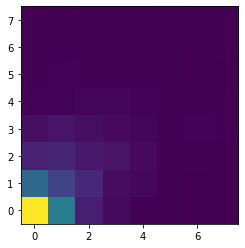

In [9]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [10]:
agent.train()

Start training...
Epoch: 0 Loss: 4.963235378265381
Epoch: 9 Loss: 1.9310537576675415
Epoch: 18 Loss: 1.4195019006729126
Epoch: 27 Loss: 1.4717235565185547
Epoch: 36 Loss: 0.7840450406074524
Epoch: 45 Loss: 1.3989465236663818
Epoch: 54 Loss: 0.4461383819580078
Epoch: 63 Loss: 0.6137492060661316
Epoch: 72 Loss: 0.6083923578262329
Epoch: 81 Loss: 0.6256875991821289
Epoch: 90 Loss: 0.2301100194454193
Epoch: 99 Loss: 0.1266760379076004
Epoch: 108 Loss: 0.14020608365535736
Epoch: 117 Loss: 0.044625747948884964
Epoch: 126 Loss: 0.02738785184919834
Epoch: 135 Loss: 0.24748621881008148
Epoch: 144 Loss: 0.25553223490715027
Epoch: 153 Loss: 0.0647277683019638
Epoch: 162 Loss: 0.036892976611852646
Epoch: 171 Loss: 0.1769683063030243
Epoch: 180 Loss: 0.057681769132614136
Epoch: 189 Loss: 0.027488866820931435
Epoch: 198 Loss: 0.0366317555308342


Let's plot the trained policy and sample from it to get a probability distribution over the environment:

2/2 [==============================] - 0s 2ms/step


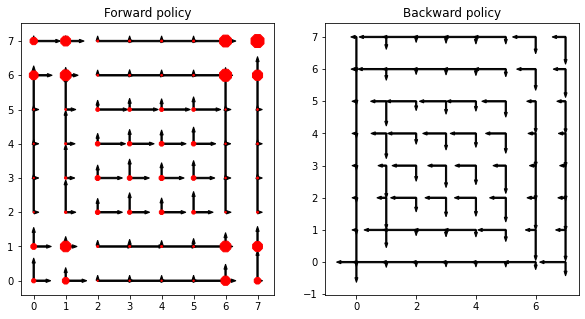

In [11]:
agent.plot_policy_2d()

63/63 [==============================] - 0s 650us/step


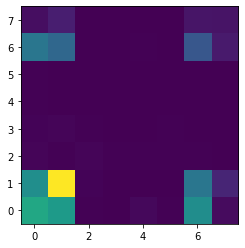

In [12]:
l1_error_after = agent.compare_env_to_model_policy()

In [13]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

L1 error before 1.53 and after 0.76


While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)